In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d


In [3]:
simulated = pd.read_csv("data/20220609_FSLFS_FINERESULTS.csv")

In [4]:
lfs_sim.columns

NameError: name 'lfs_sim' is not defined

In [5]:
fs_sim = simulated.loc[simulated.chip_number==0,:]
lfs_sim = simulated.loc[simulated.chip_number==1,:]


In [84]:
fs = pd.read_csv("FS_experimental_results.csv")
fs.rename(columns={"exp. Regime":"exp_regime", "Ca":"capillary_number","FRR":"flow_rate_ratio"}, inplace=True)
lfs = pd.read_csv("LFS_experimental_results.csv")
lfs.rename(columns={"exp. Regime":"exp_regime", "Ca":"capillary_number","FRR":"flow_rate_ratio"}, inplace=True)

In [8]:
fs_sim.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'Unnamed: 0.1.1', 'aspect_ratio',
       'capillary_number', 'chip_number', 'droplet_size', 'expansion_ratio',
       'flow_rate_ratio', 'generation_rate', 'inferred_size',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size', 'regime', 'boundary',
       'water_flow', 'oil_flow'],
      dtype='object')

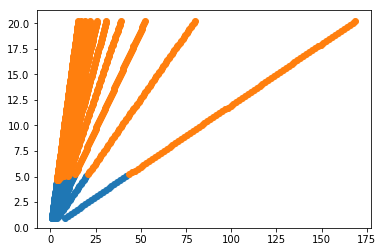

In [98]:
import matplotlib
used = fs_sim


# r1 = used.loc[used.regime==1,["capillary_number", "flow_rate_ratio"]].reset_index()
# r2 = used.loc[used.regime==2,["capillary_number", "flow_rate_ratio"]].reset_index()

r1 = used.loc[used.regime==1,["water_flow", "oil_flow"]].reset_index()
r2 = used.loc[used.regime==2,["water_flow", "oil_flow"]].reset_index()

# plt.plot(,fs.loc[fs.regime==1,"FRR"],"o")
# plt.plot(fs.loc[fs.regime==2,"Ca"],fs.loc[fs.regime==2,"FRR"],"o")

for df in [r1, r2]:
    points = np.array([[df.water_flow[i], df.oil_flow[i]] for i in range(len(df.water_flow))])


    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1])
#     for simplex in hull.simplices:
#         plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
#     # plt.plot(fs.loc[fs.exp_regime==1,"Ca"],fs.loc[fs.exp_regime==1,"FRR"], ".")
#     # plt.plot(fs.loc[fs.exp_regime==2,"Ca"],fs.loc[fs.exp_regime==2,"FRR"], ".")

#plt.xlim([0, 10])
#plt.ylim([0,1])

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# plt.savefig("20220609_LFS_simulated.pdf")


In [ ]:
lfs_cts = [230, 29, 201]
fs_cts = [230,206,24]

In [22]:
r1.loc[r1.capillary_number < .28,:].shape

(206, 3)

(0, 22)

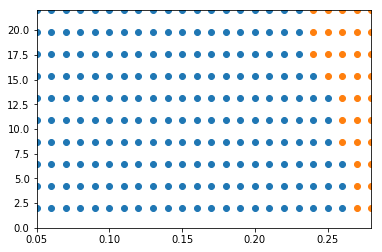

In [20]:
import matplotlib
used = fs_sim


r1 = used.loc[used.regime==1,["capillary_number", "flow_rate_ratio"]].reset_index()
r2 = used.loc[used.regime==2,["capillary_number", "flow_rate_ratio"]].reset_index()

# r1 = used.loc[used.regime==1,:]#["water_flow", "oil_flow"]].reset_index()
# r2 = used.loc[used.regime==2,["water_flow", "oil_flow"]].reset_index()

# plt.plot(,fs.loc[fs.regime==1,"FRR"],"o")
# plt.plot(fs.loc[fs.regime==2,"Ca"],fs.loc[fs.regime==2,"FRR"],"o")

for df in [r1, r2]:
    points = np.array([[df.capillary_number[i], df.flow_rate_ratio[i]] for i in range(len(df.capillary_number))])


    #hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1])
#     for simplex in hull.simplices:
#         plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
#     # plt.plot(fs.loc[fs.exp_regime==1,"Ca"],fs.loc[fs.exp_regime==1,"FRR"], ".")
#     # plt.plot(fs.loc[fs.exp_regime==2,"Ca"],fs.loc[fs.exp_regime==2,"FRR"], ".")

plt.xlim([0.05, 0.28])
plt.ylim([0,22])

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# plt.savefig("20220609_LFS_simulated.pdf")

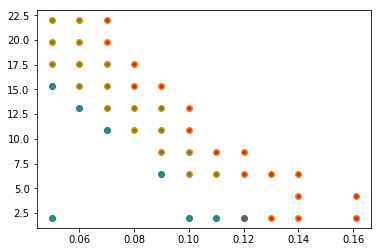

In [23]:
plt.plot(lfs.loc[lfs.regime==1,"Ca"],lfs.loc[lfs.regime==1,"FRR"],"o")
plt.plot(lfs.loc[lfs.regime==2,"Ca"],lfs.loc[lfs.regime==2,"FRR"],"o")

plt.plot(lfs.loc[lfs.exp_regime==1,"Ca"],lfs.loc[lfs.exp_regime==1,"FRR"], ".")
plt.plot(lfs.loc[lfs.exp_regime==2,"Ca"],lfs.loc[lfs.exp_regime==2,"FRR"], ".")


In [ ]:
oil_flow(Ca_num * 0.005 * channel_height * oil_inlet * 1e-12) / \
                    (0.0572 * ((water_inlet_width * 1e-6)) * (
                            (1 / (Or * 1e-6)) - (1 / (2 * oil_inlet * 1e-6))))

Single Point observation

In [25]:
cols = ['Ca', 'FRR', 'water_flow', 'oil_flow', 'oil_flow_per_input', 'droplet_size',
       'generation_rate', 'flow_stability', 'exp_flow_stability',
       'regime', 'boundary', 'exp_regime', 'exp_size', 'exp_rate']

comp = pd.read_csv("20220807_FSLFS_compare.csv")
comp.index = comp.iloc[:,0]
comp = comp.iloc[:,1:]
comp.columns = cols

In [26]:
comp

,Ca,FRR,water_flow,oil_flow,oil_flow_per_input,droplet_size,generation_rate,flow_stability,exp_flow_stability,regime,boundary,exp_regime,exp_size,exp_rate
Unnamed: 0,,,,,,,,,,,,,,
LFS,0.05,15.333333,0.336705,0.309768,0.154884,103.312088,45.387672,0.000000,0.124171,1,1,1,63.63,42
FS,0.05,15.333333,1.047526,0.963724,0.481862,110.299873,38.842239,2.143039,1.929000,1,0,1,92.57,42


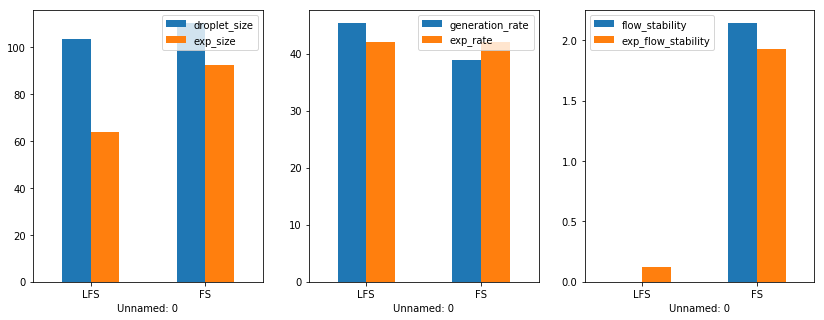

In [41]:
import matplotlib
fig, axs = plt.subplots(1,3, figsize=[14,5])
comp.plot.bar(ax = axs[0], y=['droplet_size', "exp_size"], rot=0)
comp.plot.bar(ax = axs[1], y=['generation_rate', "exp_rate"], rot=0)
comp.plot.bar(ax = axs[2], y=['flow_stability', "exp_flow_stability"], rot=0)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("20220807_FSLFS_sim.pdf")
